In [12]:
import pandas as pd


In [13]:
df = pd.read_csv('first_batch_salad_data.csv')


In [14]:
df.head()


,measurement_id,sensor,measured_at,humdity,weather_measured_at,weather_himidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure
0,73,MAIN,2023-04-18 15:53:41.574135,39.967,2023-04-18 15:45:00.000000,55,0.0,25,14.0,3.0,1025.0
1,74,MAIN,2023-04-18 15:58:43.051105,40.083,2023-04-18 15:45:00.000000,55,0.0,25,14.0,3.0,1025.0
2,75,MAIN,2023-04-18 16:03:44.586642,40.167,2023-04-18 16:00:00.000000,55,0.0,0,14.0,4.0,1025.0
3,76,MAIN,2023-04-18 16:08:46.053279,40.133,2023-04-18 16:00:00.000000,55,0.0,25,14.0,4.0,1025.0
4,77,MAIN,2023-04-18 16:13:47.546052,48.117,2023-04-18 16:00:00.000000,55,0.0,25,14.0,4.0,1025.0


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6043 entries, 0 to 6042
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   measurement_id         6043 non-null   int64  
 1   sensor                 6043 non-null   object 
 2   measured_at            6043 non-null   object 
 3   humdity                6043 non-null   float64
 4   weather_measured_at    6043 non-null   object 
 5   weather_himidity       6043 non-null   int64  
 6   weather_precipitation  6043 non-null   float64
 7   weather_cloud          6043 non-null   int64  
 8   weather_temperature    6043 non-null   float64
 9   weather_uv_index       6043 non-null   float64
 10  weather_pressure       6043 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 519.4+ KB


In [16]:
df.describe()


,measurement_id,humdity,weather_himidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure
count,6043.000000,6043.000000,6043.000000,6043.000000,6043.000000,6043.000000,6043.000000,6043.000000
mean,3098.372828,53.219127,74.365547,0.195400,43.815820,12.571620,2.719345,1015.851398
std,1747.451966,19.618362,18.389203,0.588114,39.057042,4.374862,1.597955,6.096224
min,73.000000,24.760000,27.000000,0.000000,0.000000,-1.000000,1.000000,1000.000000
25%,1583.500000,38.033000,60.000000,0.000000,0.000000,10.000000,1.000000,1013.000000
50%,3101.000000,42.310000,76.000000,0.000000,37.000000,13.000000,3.000000,1016.000000
75%,4611.500000,70.155000,93.000000,0.100000,75.000000,15.000000,4.000000,1019.000000
max,6122.000000,89.600000,100.000000,4.900000,100.000000,23.000000,6.000000,1028.000000


In [17]:
df['measured_at'] = df['measured_at'].apply(lambda x: str(x).split('.')[0])
df['measured_at'] = pd.to_datetime(df['measured_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

df['weather_measured_at'] = df['weather_measured_at'].apply(lambda x: str(x).split('.')[0])
df['weather_measured_at'] = pd.to_datetime(df['weather_measured_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6043 entries, 0 to 6042
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   measurement_id         6043 non-null   int64         
 1   sensor                 6043 non-null   object        
 2   measured_at            6043 non-null   datetime64[ns]
 3   humdity                6043 non-null   float64       
 4   weather_measured_at    6043 non-null   datetime64[ns]
 5   weather_himidity       6043 non-null   int64         
 6   weather_precipitation  6043 non-null   float64       
 7   weather_cloud          6043 non-null   int64         
 8   weather_temperature    6043 non-null   float64       
 9   weather_uv_index       6043 non-null   float64       
 10  weather_pressure       6043 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(3), object(1)
memory usage: 519.4+ KB


In [19]:
df.head()


,measurement_id,sensor,measured_at,humdity,weather_measured_at,weather_himidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure
0,73,MAIN,2023-04-18 15:53:41,39.967,2023-04-18 15:45:00,55,0.0,25,14.0,3.0,1025.0
1,74,MAIN,2023-04-18 15:58:43,40.083,2023-04-18 15:45:00,55,0.0,25,14.0,3.0,1025.0
2,75,MAIN,2023-04-18 16:03:44,40.167,2023-04-18 16:00:00,55,0.0,0,14.0,4.0,1025.0
3,76,MAIN,2023-04-18 16:08:46,40.133,2023-04-18 16:00:00,55,0.0,25,14.0,4.0,1025.0
4,77,MAIN,2023-04-18 16:13:47,48.117,2023-04-18 16:00:00,55,0.0,25,14.0,4.0,1025.0


In [20]:
df[df.isna().any(axis=1)]


,measurement_id,sensor,measured_at,humdity,weather_measured_at,weather_himidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure


In [21]:
df.drop(columns=["weather_measured_at", "measurement_id"], inplace=True)

In [25]:
df['humidity_change'] = df['humdity'].pct_change()


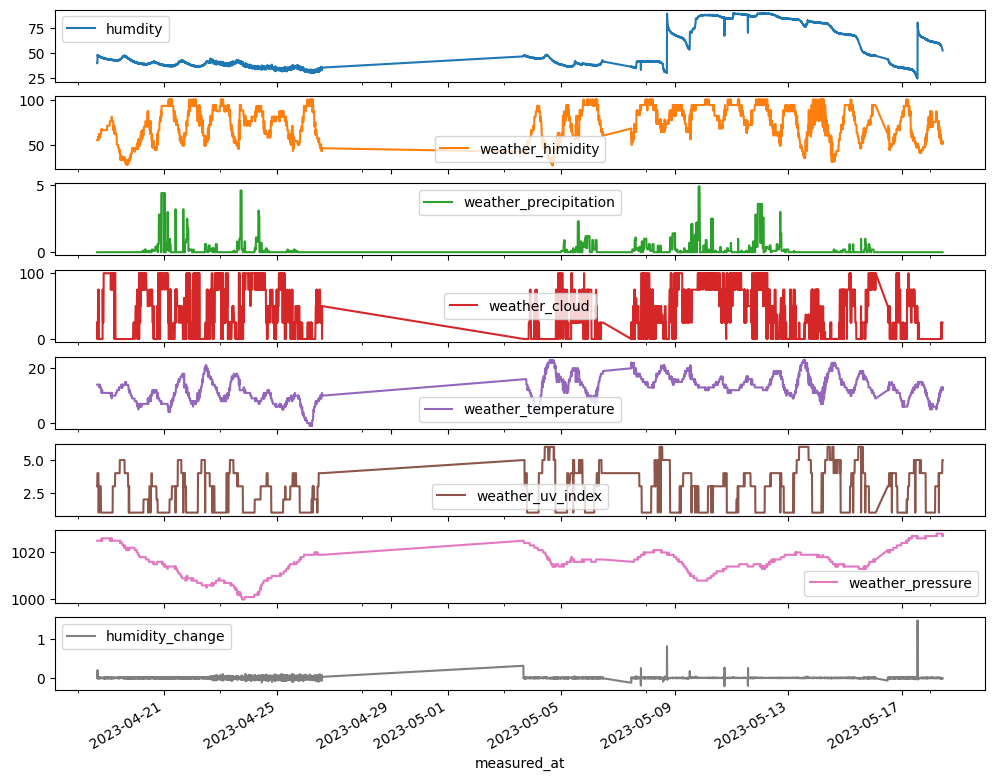

In [26]:
df.plot(x='measured_at', subplots=True, figsize=(12, 10));


In [35]:
df[df['humidity_change'] > 0.15]

,sensor,measured_at,humdity,weather_himidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure,humidity_change
4,MAIN,2023-04-18 16:13:47,48.117,55,0.0,25,14.0,4.0,1025.0,0.198939
2268,MAIN,2023-05-03 16:04:03,46.620,42,0.0,0,16.0,5.0,1025.0,0.310176
3142,MAIN,2023-05-07 19:27:06,41.570,88,0.0,0,17.0,3.0,1019.0,0.251355
3404,MAIN,2023-05-08 17:25:00,54.810,73,0.0,0,19.0,5.0,1019.0,0.810106
3405,MAIN,2023-05-08 17:30:02,88.860,73,0.0,0,19.0,5.0,1019.0,0.621237
3634,MAIN,2023-05-09 12:41:56,64.080,83,0.7,75,17.0,4.0,1011.0,0.175996
3981,MAIN,2023-05-10 18:04:26,84.740,88,0.1,75,13.0,3.0,1013.0,0.266288
4215,MAIN,2023-05-11 13:55:43,87.660,68,0.0,50,17.0,4.0,1014.0,0.254257
5790,MAIN,2023-05-17 13:10:38,61.130,47,0.0,25,13.0,5.0,1027.0,1.468901
5791,MAIN,2023-05-17 13:15:40,79.910,47,0.0,25,13.0,5.0,1027.0,0.307214


In [36]:
df['humidity_change'][df['humidity_change'] > 0.15] = df['humidity_change'].mean()

/var/folders/sz/h0zc22s51xq3nbj67pg7pz3m0000gn/T/ipykernel_7852/2331598800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['humidity_change'][df['humidity_change'] > 0.15] = df['humidity_change'].mean()


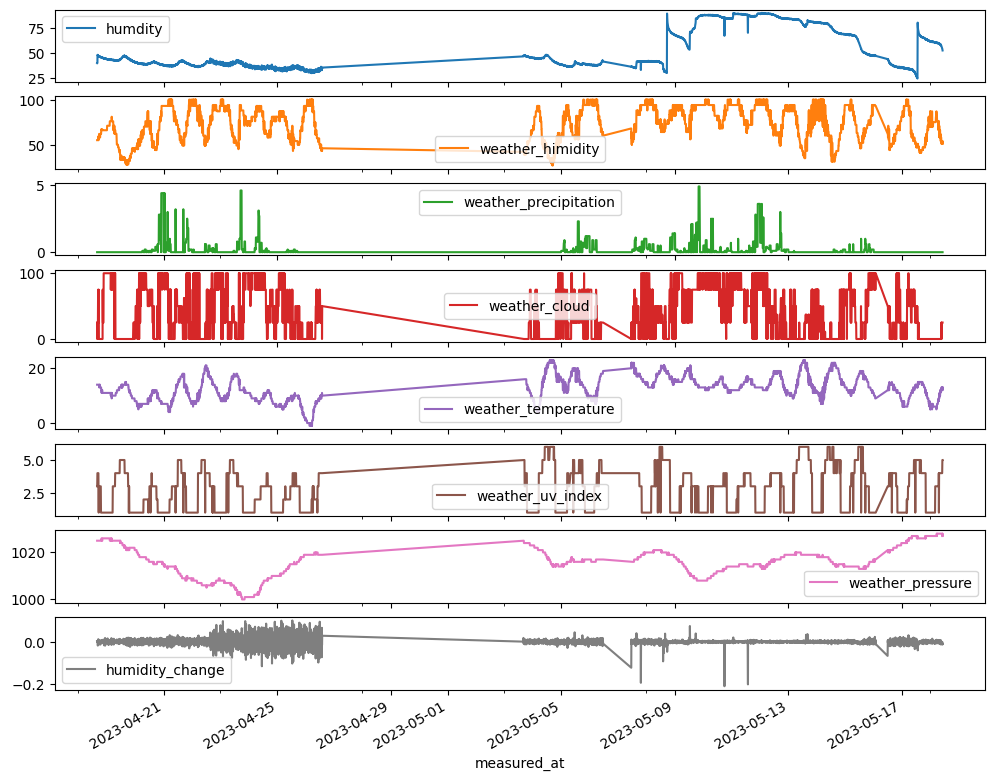

In [37]:
df.plot(x='measured_at', subplots=True, figsize=(12, 10));
